### 線形回帰分類をpythonで実装

In [39]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams

In [15]:
K = 200
p = 2
x = np.array([np.random.randn(K*p)]).reshape(p,K)

$$
y=0.2(x_1-1)^2+0.5(x_2-0.5)^2,\ \ x_1, x_2 \sim N(0,1)
$$

In [16]:
ctr1 = 1
ctr2 = 0.5
r1 = 0.2
r2 = 0.5
v = r1 * ((x[0]-ctr1) ** 2) + r2 * ((x[1]-ctr2) ** 2)

閾値を$t=1.2$に設定し、それぞれの$y_i$が閾値以上であれば90%の確率でクラス$0$に、閾値未満であれば90%の確率でクラス$1$に分類されるように設定する。

In [17]:
t = 1.2
v0 = np.where(v < t)
v1 = np.where(v >= t)

gr = np.zeros(K)
p0 = 0.1
p1 = 0.9
gr[v0] = np.random.choice([0,1],len(v0),replace=True,p=[p0,1-p0])
gr[v1] = np.random.choice([0,1],len(v1),replace=True,p=[p1,1-p1])

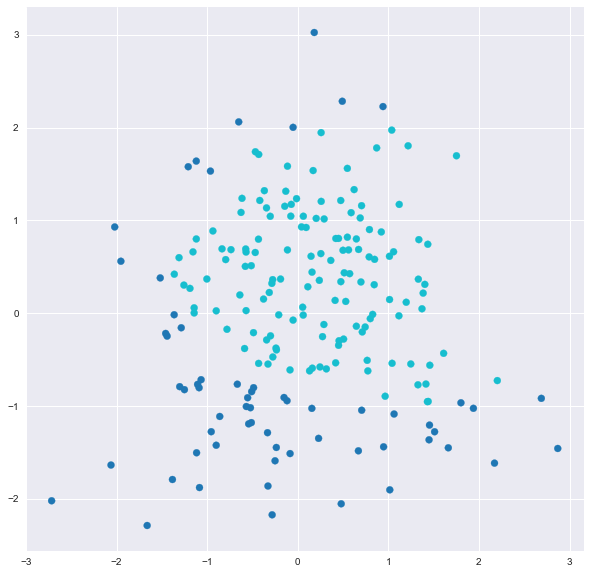

In [41]:
rcParams['figure.figsize'] = 10,10

cmap = plt.get_cmap("tab10")
plt.scatter(x[0],x[1],c=cmap(gr))
plt.grid(True)
plt.show()

線形分類する。  
$$
\hat{y}=\beta_0+\beta_1 x_1+\beta_2 x_2
$$
での分類を行う。

In [21]:
from sklearn import linear_model

In [22]:
lreg = linear_model.LinearRegression()
lreg.fit(x.T,gr.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
gr_ = lreg.predict(x.reshape(K,p))

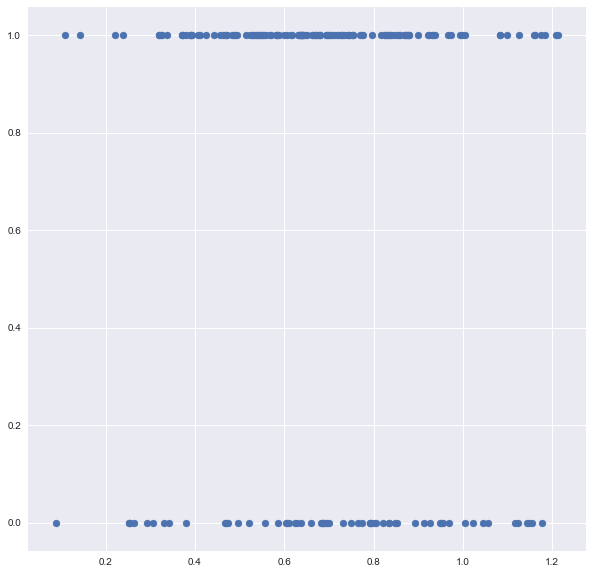

In [42]:
plt.scatter(gr_,gr)

In [25]:
x0_ = np.linspace(min(x[0]),max(x[0]),100)
x1_ = np.linspace(min(x[1]),max(x[1]),100)

In [26]:
x_ = np.empty((0,2),float)
for i in x0_:
    for j in x1_:
        x_ = np.append(x_,np.array([[i,j]]),axis=0)

データから求められた偏回帰係数で分類される領域を色分けし、そこに元のデータを重ねる。

In [27]:
y_ = lreg.intercept_ + lreg.coef_[0][0]*x_.T[0] + lreg.coef_[0][1]*x_.T[1]

col = (y_ > 0.5)+2

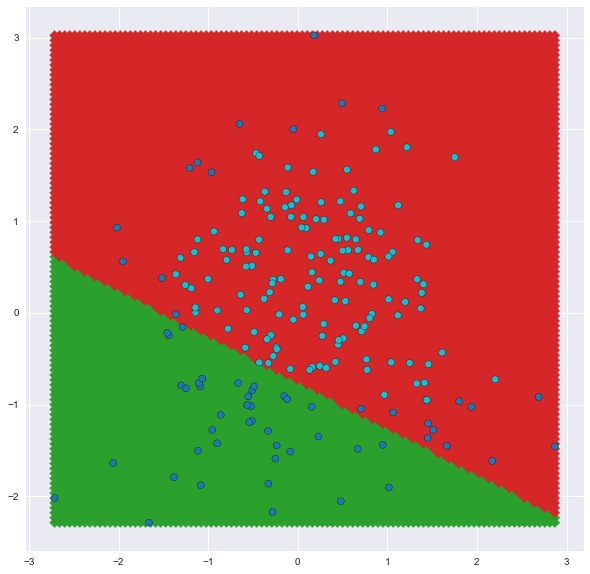

In [43]:
plt.scatter(x_.T[0],x_.T[1],c=cmap(col),marker='D')
plt.scatter(x[0],x[1],c=cmap(gr),edgecolors='black')
plt.figure(figsize=(10,10),dpi=200)
plt.show()

### SVM

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn; 
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl

seaborn.set()

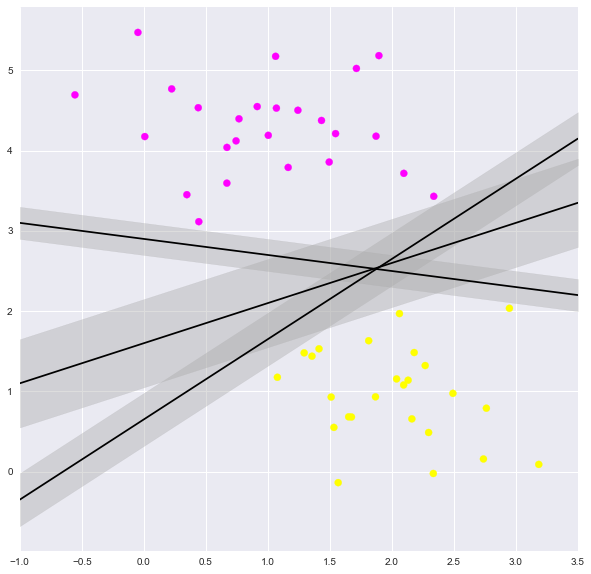

In [75]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')

# Draw three lines that couple separate the data
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In [76]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [77]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function(np.array([[xi, yj]]))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

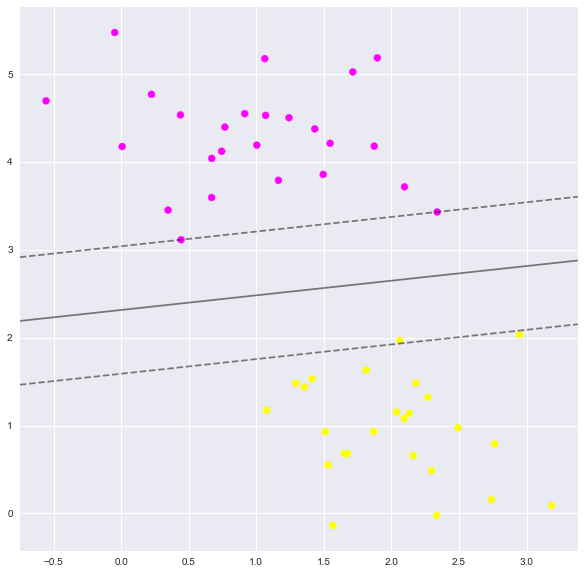

In [79]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');

In [80]:
from IPython.html.widgets import interact

def plot_svm(N=100):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    clf = SVC(kernel='linear')
    clf.fit(X, y)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
    plt.xlim(-1, 4)
    plt.ylim(-1, 6)
    plot_svc_decision_function(clf, plt.gca())
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                s=200, facecolors='none')
    
interact(plot_svm, N=[10, 200], kernel='linear');

interactive(children=(Dropdown(description='N', options=(10, 200), value=10), Output()), _dom_classes=('widget-interact',))

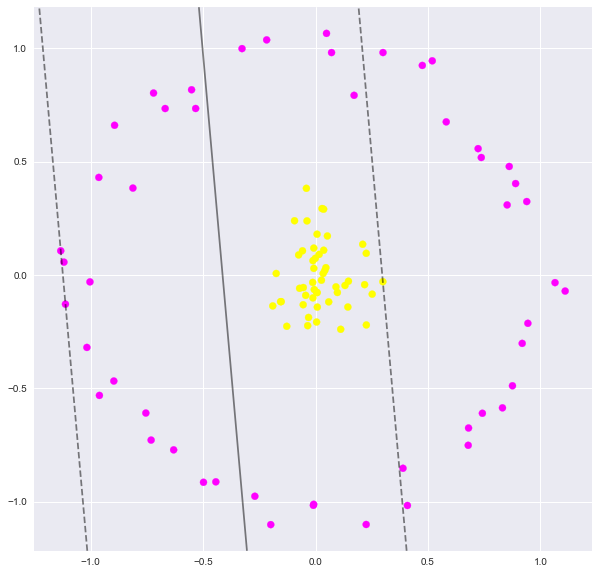

In [81]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf);

In [82]:
r = np.exp(-(X[:, 0] ** 2 + X[:, 1] ** 2))

from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 90], azip=(-180, 180));

interactive(children=(Dropdown(description='elev', options=(-90, 90), value=-90), IntSlider(value=30, description='azim', max=90, min=-30), Output()), _dom_classes=('widget-interact',))

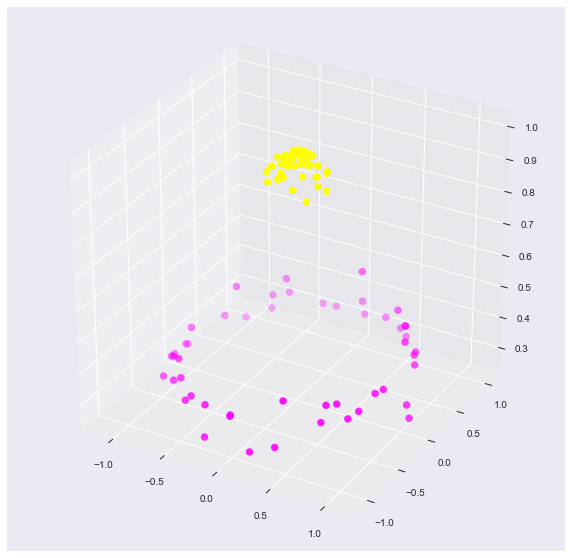

In [86]:
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='spring')

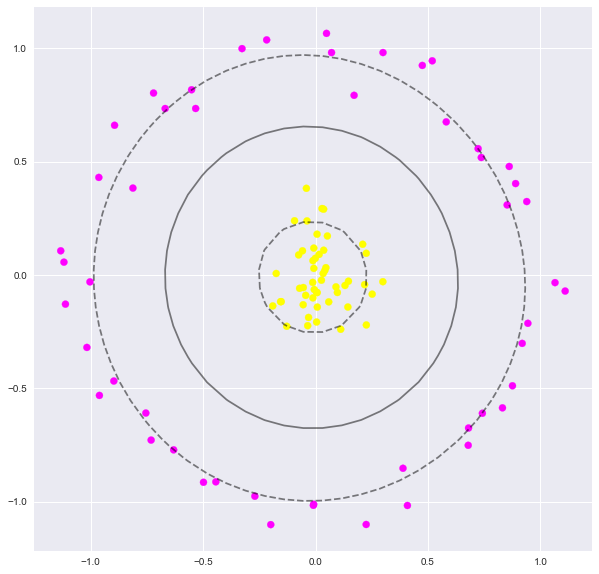

In [83]:
clf = SVC(kernel='rbf')
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=200, facecolors='none');